# Q6 Bank Customer Clustering

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, Birch, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# 1. Data Loading and Basic Preprocessing

In [3]:
# File path to the dataset - replace 'path_to_your_file' with the actual path
file_path = 'Data_Q6/Bank_Customer.csv'

# Read the CSV file
data = pd.read_csv(file_path)

In [4]:
data

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2018/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2018/9/16,184706,1000.0


## 2. Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDateOfBirth      1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
# Handle missing values
# Fill missing values in the CustomerDateOfBirth column
data['CustomerDateOfBirth'] = pd.to_datetime(data['CustomerDateOfBirth'], errors='coerce')
data['CustomerDateOfBirth'].fillna(data['CustomerDateOfBirth'].median(), inplace=True)

# Fill missing values in CustGender and CustLocation columns
data['CustGender'].fillna(data['CustGender'].mode()[0], inplace=True)
data['CustLocation'].fillna(data['CustLocation'].mode()[0], inplace=True)

# Convert data types
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CustomerID'] = data['CustomerID'].astype(str)  # If needed, convert CustomerID to string type

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1144\905591144.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CustomerDateOfBirth'] = pd.to_datetime(data['CustomerDateOfBirth'], errors='coerce')


In [7]:
# Remove duplicate records
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustomerDateOfBirth      1048567 non-null  datetime64[ns]
 3   CustGender               1048567 non-null  object        
 4   CustLocation             1048567 non-null  object        
 5   CustAccountBalance       1046198 non-null  float64       
 6   TransactionDate          1048567 non-null  datetime64[ns]
 7   TransactionTime          1048567 non-null  int64         
 8   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


## 3. EDA

### (1) Exploration of Amount Data

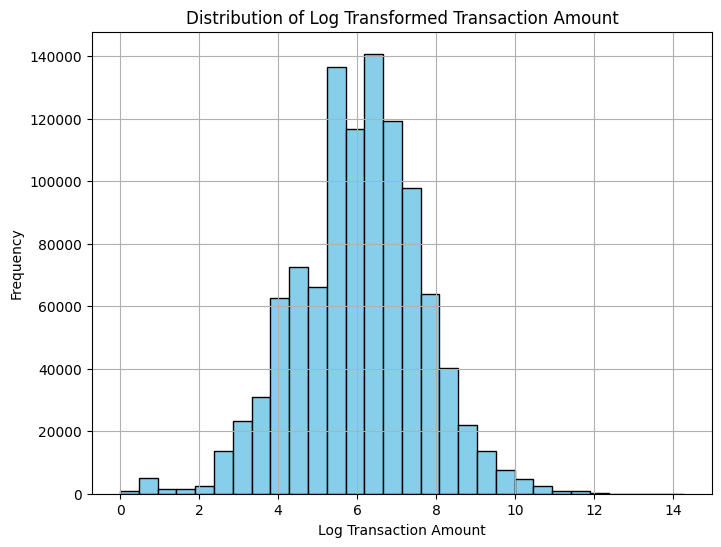

In [15]:
# Applying log transformation to TransactionAmount column
data['Log_TransactionAmount'] = np.log1p(data['TransactionAmount (INR)'])

# Plotting histogram of log-transformed data
plt.figure(figsize=(8, 6))
plt.hist(data['Log_TransactionAmount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Log Transformed Transaction Amount')
plt.xlabel('Log Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

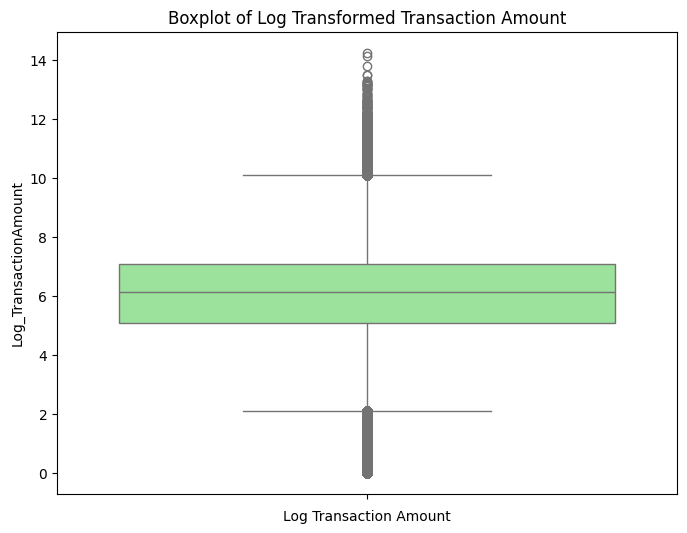

In [16]:
# Plotting boxplot of log-transformed data
plt.figure(figsize=(8, 6))
sns.boxplot(data['Log_TransactionAmount'], color='lightgreen')
plt.title('Boxplot of Log Transformed Transaction Amount')
plt.xlabel('Log Transaction Amount')
plt.show()

**Insight 1:** Due to the long-tail effect observed in the direct distribution analysis, I examined the logarithmic distribution of transaction amounts. When plotted on a logarithmic scale, it demonstrated a normal distribution pattern. From this, we can draw the following analysis:：
1. The logarithmic transformation brings the data closer to a normal distribution, suggesting increased symmetry and alignment with common statistical assumptions on a logarithmic scale. This situation indicates that using statistical methods based on the normal distribution for analysis and modeling, particularly on "transaction amounts in logarithmic scale," might yield more reliable and clearer results compared to applying these methods directly on the original data.
2. The presentation of a normal distribution after the logarithmic transformation implies that the data largely exhibits characteristics of exponential growth or a long-tail distribution. This suggests the existence of extreme or outlier values that are diminished after the logarithmic transformation, thereby bringing the overall distribution closer to a normal curve.。













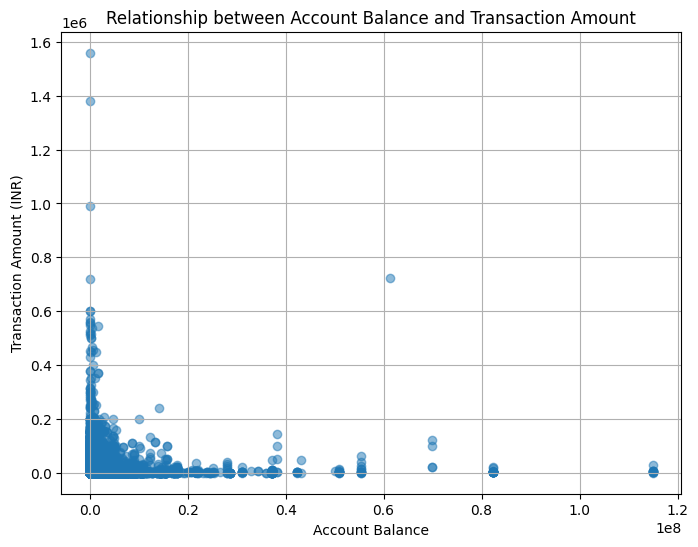

In [17]:
# Assuming 'data' is your DataFrame name
plt.figure(figsize=(8, 6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], alpha=0.5)
plt.title('Relationship between Account Balance and Transaction Amount')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.grid(True)
plt.show()

**Insight 2:** The clustering of points in the scatter plot, concentrated in the bottom-left corner and spreading along both axes, often indicates a certain constraint or relationship between two variables. In our dataset, lower account balances tend to correspond with lower transaction amounts. This clustering might reflect a pattern in user behavior, suggesting that when account balances are lower, users tend to engage in smaller transactions, while users with higher account balances participate in larger transactions.

### (2) Exploration of customer profiles

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14032\2516699729.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Log_CustAccountBalance'], shade=True, color='orange')


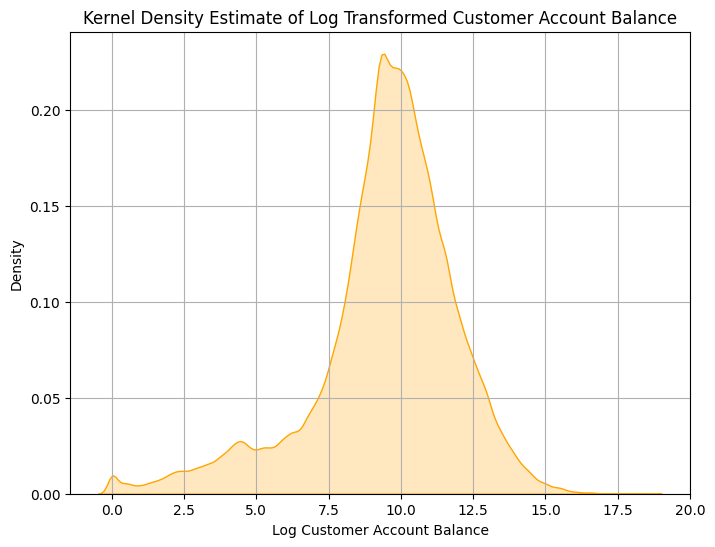

In [22]:
# Applying log transformation to CustAccountBalance column
data['Log_CustAccountBalance'] = np.log1p(data['CustAccountBalance'])

# Plotting kernel density estimate of log-transformed data
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Log_CustAccountBalance'], shade=True, color='orange')
plt.title('Kernel Density Estimate of Log Transformed Customer Account Balance')
plt.xlabel('Log Customer Account Balance')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [25]:
log_densitypeak_value = 10
densitypeak_value = np.expm1(log_densitypeak_value)
print(f"The value of Customer Account Balance with a peak density is around: {peak_value:.2f}")

The value of Customer Account Balance with a peak density is around: 22025.47


**Insight 3:** Due to the long-tail effect observed in the direct statistical distribution, I analyzed the logarithmic distribution of customer account balances. Similarly to transaction amounts, the logarithmic plot of account balances also displays a Gaussian-like distribution when viewed on a logarithmic scale. The peak density is observed around 22025.47.

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14032\3501342829.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['CustomerAge'], shade=True, color='purple')


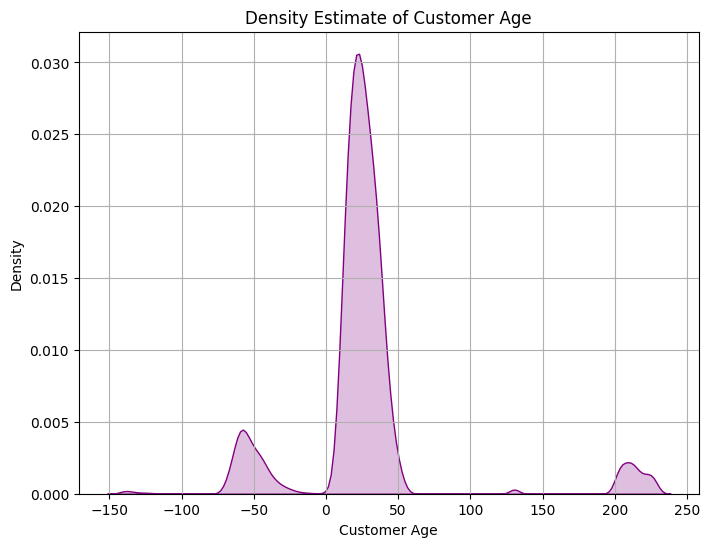

In [32]:
# Calculating age from transaction date and date of birth
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CustomerAge'] = data['TransactionDate'].dt.year - data['CustomerDateOfBirth'].dt.year

# Plotting log density estimate of customer age
plt.figure(figsize=(8, 6))
sns.kdeplot(data['CustomerAge'], shade=True, color='purple')
plt.title('Density Estimate of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14032\4237893382.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['CustomerAge'], shade=True, color='purple')


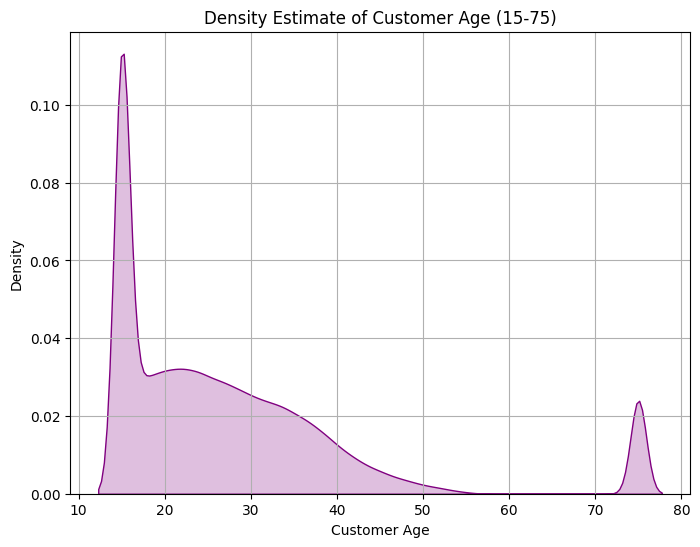

In [36]:
# Calculating age from transaction date and date of birth, limiting age range to 15-75
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['CustomerAge'] = data['TransactionDate'].dt.year - data['CustomerDateOfBirth'].dt.year
data['CustomerAge'] = np.clip(data['CustomerAge'], 15, 75)  # 限制年龄在15到75之间

# Plotting log density estimate of customer age
plt.figure(figsize=(8, 6))
sns.kdeplot(data['CustomerAge'], shade=True, color='purple')
plt.title('Density Estimate of Customer Age (15-75)')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()

**Insight 4:**
Due to the sensitivity and voluntary nature of age disclosure by customers, the derived age values from customer-provided information might lack accuracy. Moreover, the observed age distribution does not consistently align with real societal demographics. Therefore, age should not be considered a significant factor in subsequent analyses.

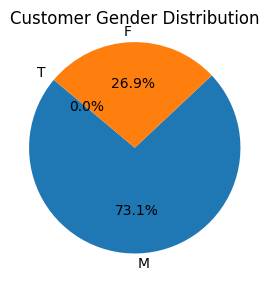

In [38]:
# Counting values for each gender
gender_counts = data['CustGender'].value_counts()

# Plotting pie chart for gender distribution
plt.figure(figsize=(3, 3))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()


**Insight 5:** From the gender distribution data, it's evident that the customer base is predominantly male. This insight suggests that the bank may need to offer more tailored services to minority gender groups to attract a more diverse customer base.

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_14032\1896376237.py:2: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='CustGender', y='CustAccountBalance', data=data, bw=0.5)  # 调整核密度估计带宽


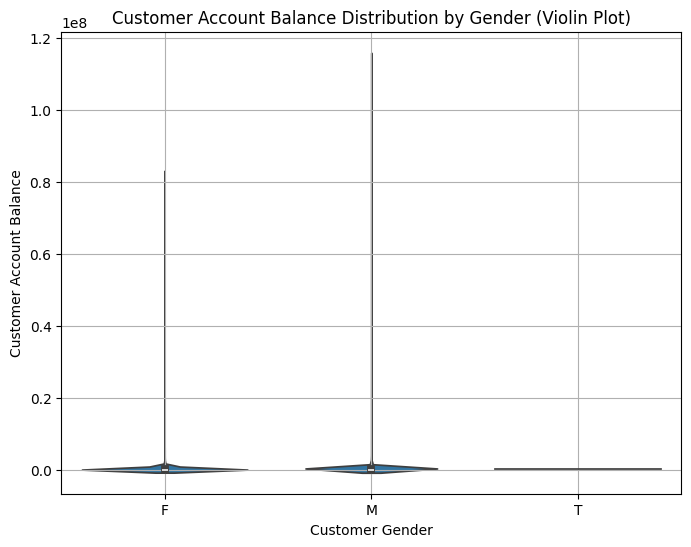

In [40]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='CustGender', y='CustAccountBalance', data=data, bw=0.5)  # 调整核密度估计带宽
plt.title('Customer Account Balance Distribution by Gender (Violin Plot)')
plt.xlabel('Customer Gender')
plt.ylabel('Customer Account Balance')
plt.grid(True)
plt.show()

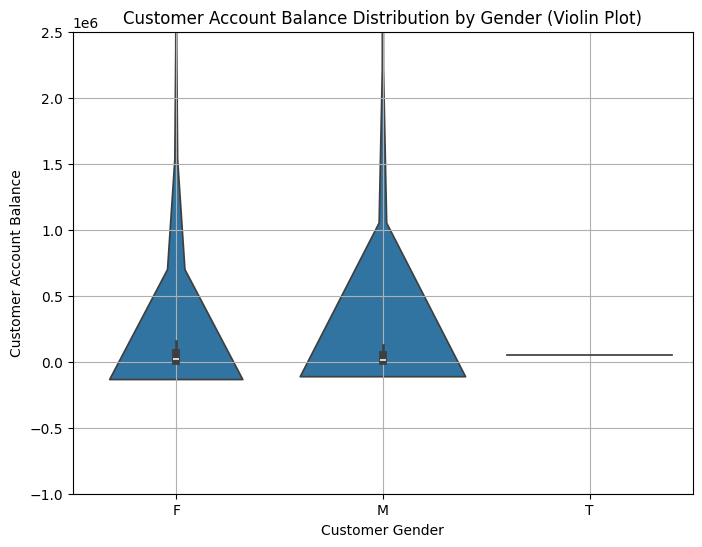

In [8]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='CustGender', y='CustAccountBalance', data=data)
plt.title('Customer Account Balance Distribution by Gender (Violin Plot)')
plt.xlabel('Customer Gender')
plt.ylabel('Customer Account Balance')
plt.ylim(-0.1e7, 0.25e7)  # 设置纵坐标的范围为0到2e8
plt.grid(True)
plt.show()

**Insight 6:** Although the effectiveness of the Customer Account Balance Distribution by Gender (Violin Plot) isn't significant, it still reveals that both male and female customers tend to concentrate their deposits within 1,000,000 units. While both genders include some high-value customers, males generally maintain a slightly higher account balance compared to females. Thus, insights from the Account Balance Distribution, as discussed in Insight 6, can be instrumental in devising strategies to attract minority customers based on their deposit patterns.

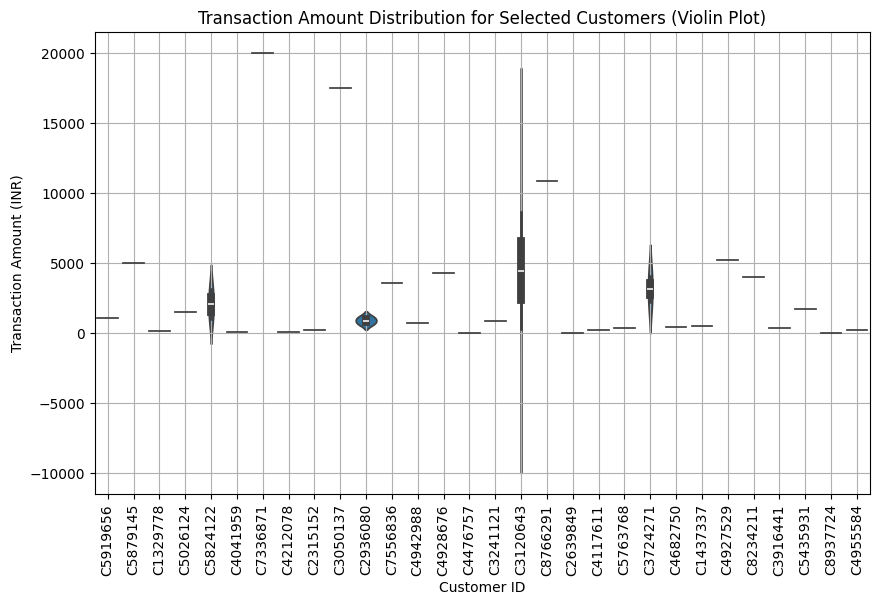

In [36]:
# 从数据中随机选择30个客户ID
import random
random.seed(42)  # 设置随机种子以确保结果可重复
selected_customers = random.sample(list(data['CustomerID'].unique()), 30)

# 筛选所选客户的数据
data_selected_customers = data[data['CustomerID'].isin(selected_customers)]

# 绘制小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(x='CustomerID', y='TransactionAmount (INR)', data=data_selected_customers)
plt.title('Transaction Amount Distribution for Selected Customers (Violin Plot)')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Amount (INR)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


**Insight 7:** We can clearly observe varying transaction distributions among customers. Most customers have only one transaction recorded, while those with multiple transactions exhibit distinct transaction amount distributions. Leveraging this transaction distribution information to create features could facilitate personalized customer services.

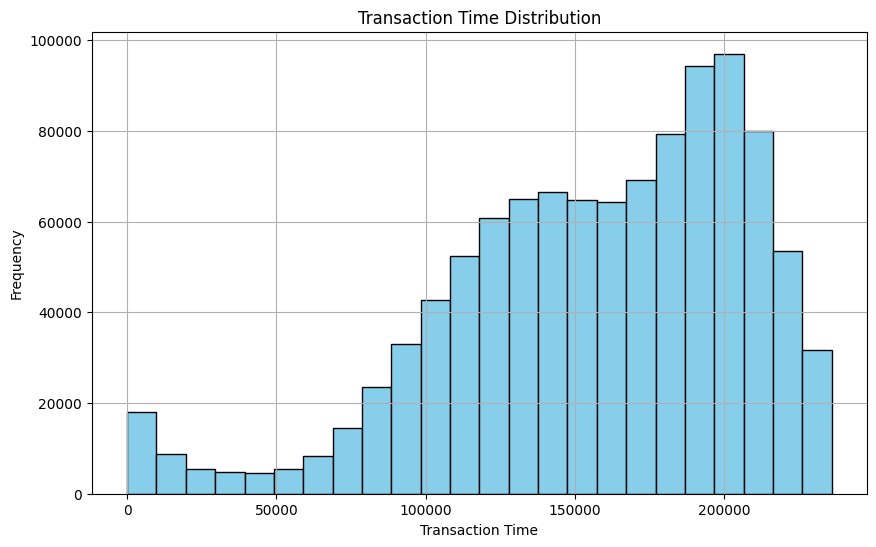

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(data['TransactionTime'], bins=24, color='skyblue', edgecolor='black')
plt.title('Transaction Time Distribution')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Insight 8:** About 200,000 transactions are the most frequently occurring, and this information not only helps to understand the current overall market situation, but also aids the bank in optimizing its transaction capacity. It allows for a more rational allocation of resources and targeted personnel arrangements based on the corresponding transaction handling capabilities.

### (3) Exploration of temporal characteristics

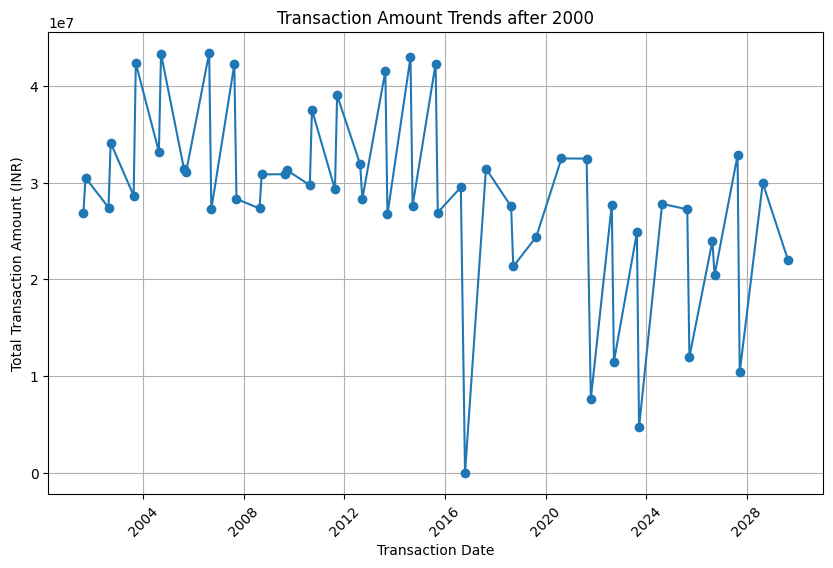

In [19]:
# Filter data for transactions after the year 2000
data_after_2000 = data[data['TransactionDate'].dt.year >= 2000]

# Grouping by date and summing transaction amounts for data after 2000
transaction_amount_after_2000 = data_after_2000.groupby('TransactionDate')['TransactionAmount (INR)'].sum()

# Plotting the line chart for transaction amount trends over time after 2000
plt.figure(figsize=(10, 6))
plt.plot(transaction_amount_after_2000.index, transaction_amount_after_2000.values, marker='o', linestyle='-')
plt.title('Transaction Amount Trends after 2000')
plt.xlabel('Transaction Date')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insight 9:** Transactions before 2016 were generally higher in volume compared to those after 2016. There seems to be a cyclical pattern in the fluctuation of transaction volumes, with a trend of rising one year and falling the next (occasionally, there are instances of two consecutive years of increase followed by a decrease, or vice versa). Leveraging this cyclicality in future transaction data could enable the development of strategies for customer service and risk control to adapt to the fluctuations in transaction volumes.

### (4) Exploration of spatial characteristics

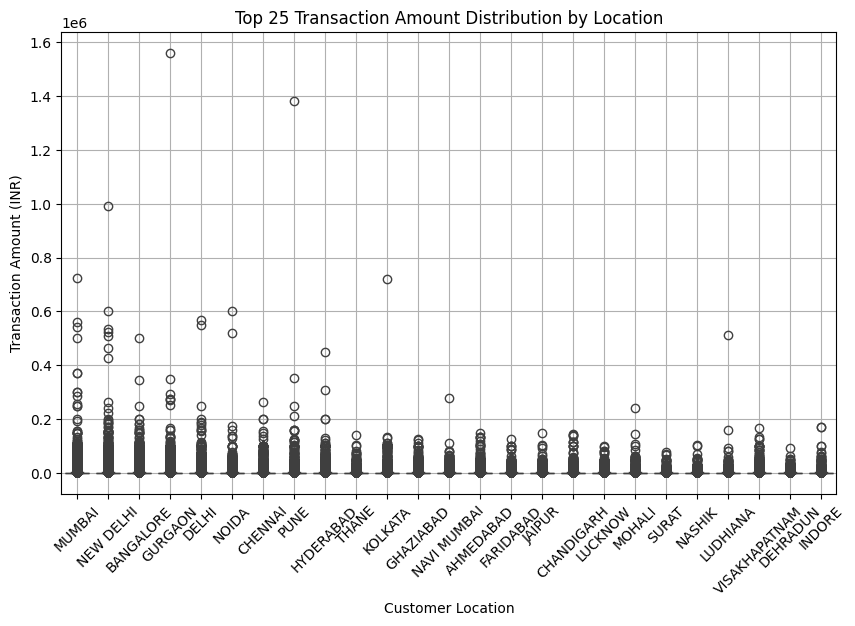

In [24]:
# Number of locations to display (change this number as needed)
top_locations_count = 25  # Change this value to display a different number of locations

top_locations = data['CustLocation'].value_counts().head(top_locations_count).index
data_top_locations = data[data['CustLocation'].isin(top_locations)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='CustLocation', y='TransactionAmount (INR)', data=data_top_locations, order=top_locations)
plt.title(f'Top {top_locations_count} Transaction Amount Distribution by Location')
plt.xlabel('Customer Location')
plt.ylabel('Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insight 10:** From the distribution of transaction amounts across the 25 example locations mentioned, it's evident that certain locations have concentrated transaction amounts (such as SURAT and KOLKATA), while others exhibit a higher dispersion across larger amounts and a substantial overall variance (such as MUMBAI and NEW DELHI). This indicates the potential for devising varied resource allocation strategies and management plans tailored to different transactional locations.

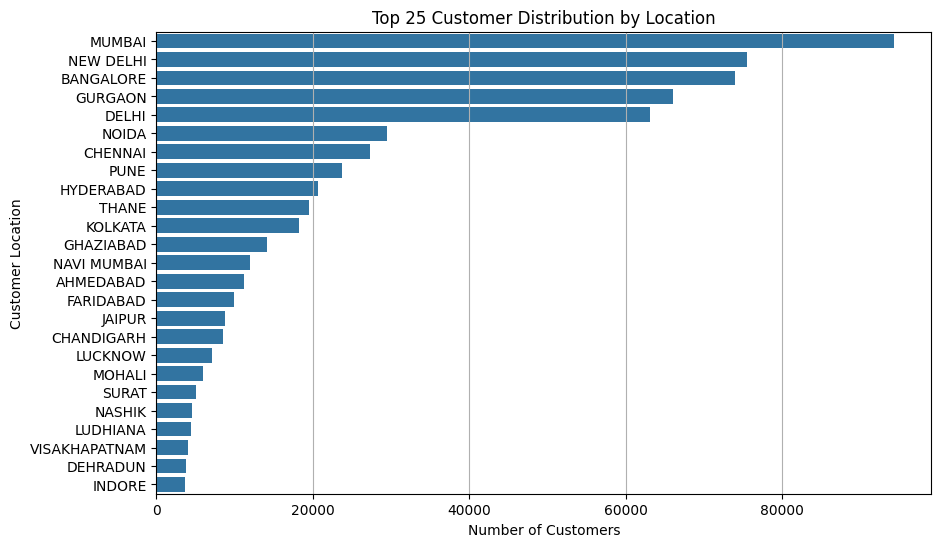

In [26]:
# Number of locations to display (change this number as needed)
top_locations_count = 25   # Change this value to display a different number of locations

top_locations = data['CustLocation'].value_counts().head(top_locations_count).index

plt.figure(figsize=(10, 6))
sns.countplot(y='CustLocation', data=data[data['CustLocation'].isin(top_locations)], order=top_locations)
plt.title(f'Top {top_locations_count} Customer Distribution by Location')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Location')
plt.grid(axis='x')
plt.show()

**Insight 11:** Based on the customer distribution across the mentioned 25 example locations, clear distinctions can be observed between densely populated customer areas and sparsely populated ones. This allows for the formulation of distinct resource allocation strategies and customer service plans tailored to different transactional locations.

## 4. Categorize customers

### 4.1 Feature Generation

In [30]:
# Calculate CustomerAge from CustomerDateOfBirth
data['CustomerAge'] = (data['TransactionDate'].dt.year - data['CustomerDateOfBirth'].dt.year)

# Calculate transaction counts for each CustomerID
transaction_counts = data['CustomerID'].value_counts().reset_index()
transaction_counts.columns = ['CustomerID', 'TransactionCount']

# Compute TransactionAmount-related features based on CustomerID
transaction_amount_stats = data.groupby('CustomerID')['TransactionAmount (INR)'].agg(['mean', 'max', 'min']).reset_index()
transaction_amount_stats.columns = ['CustomerID', 'AvgTransactionAmount', 'MaxTransactionAmount', 'MinTransactionAmount']

# Extract other features
customer_features = data[['CustomerID', 'CustomerDateOfBirth', 'CustomerAge', 'CustGender', 'CustLocation', 'CustAccountBalance']]
customer_features = customer_features.drop_duplicates(subset='CustomerID')  # Retain unique record for each CustomerID

# Merge all features into a new DataFrame
new_customer_df = pd.merge(transaction_counts, transaction_amount_stats, on='CustomerID', how='left')
new_customer_df = pd.merge(new_customer_df, customer_features, on='CustomerID', how='left')

In [31]:
new_customer_df

,CustomerID,TransactionCount,AvgTransactionAmount,MaxTransactionAmount,MinTransactionAmount,CustomerDateOfBirth,CustomerAge,CustGender,CustLocation,CustAccountBalance
0,C5533885,6,475.756667,1180.68,1.0,1990-10-07,35,M,KOLKATA,9283.45
1,C6624352,6,1395.956667,2805.00,200.0,2071-01-11,-44,M,GHAZIABAD,152832.32
2,C1736254,6,925.750000,3825.00,15.5,1989-12-10,12,F,AHMEDABAD,20205.36
3,C6735477,6,417.333333,2000.00,10.0,1990-10-31,11,M,SONITPUR,3251.63
4,C1113684,6,6312.166667,34980.00,30.0,1982-01-16,39,M,UDHAMPUR,9.85
...,...,...,...,...,...,...,...,...,...,...
884260,C8716232,1,460.000000,460.00,460.0,1989-02-02,25,F,THANE,20573.68
884261,C4474828,1,4865.000000,4865.00,4865.0,2071-03-16,-57,M,NOIDA,1602907.04
884262,C3341662,1,649.000000,649.00,649.0,1986-10-14,28,M,MUMBAI,716332.75
884263,C6821983,1,398.000000,398.00,398.0,1991-02-26,23,M,GURGAON,405469.42


In [32]:
features_for_clustering = ['TransactionCount', 'AvgTransactionAmount', 'MaxTransactionAmount', 
                           'MinTransactionAmount', 'CustomerAge', 'CustAccountBalance']

In [33]:
# Perform one-hot encoding on CustLocation
top5_locations = new_customer_df['CustLocation'].value_counts().nlargest(5).index.tolist()
middle5_locations = new_customer_df['CustLocation'].value_counts().nlargest(10).index.tolist()[5:]
all_locations = new_customer_df['CustLocation'].unique()

def classify_location(location):
    if location in top5_locations:
        return 'Top 5 Locations'
    elif location in middle5_locations:
        return 'Middle 5 Locations'
    else:
        return 'Other Locations'

new_customer_df['LocationCategory'] = new_customer_df['CustLocation'].apply(classify_location)
encoded_location = pd.get_dummies(new_customer_df['LocationCategory'])

# Perform one-hot encoding on CustGender
encoded_features = pd.get_dummies(new_customer_df[['CustGender']])

In [34]:
# add them to the list of features.
new_customer_df = pd.concat([new_customer_df, encoded_features, encoded_location], axis=1)
features_for_clustering = ['TransactionCount', 'AvgTransactionAmount', 'MaxTransactionAmount', 
                           'MinTransactionAmount', 'CustomerAge', 'CustAccountBalance']
features_for_clustering += list(encoded_features.columns) + list(encoded_location.columns)

In [36]:
X = new_customer_df[features_for_clustering].fillna(0)  # Missing value

In [37]:
X = X.drop('CustGender_T', axis=1)

### 4.2 Cluster Method

#### (1) K-means

In [38]:
X

,TransactionCount,AvgTransactionAmount,MaxTransactionAmount,MinTransactionAmount,CustomerAge,CustAccountBalance,CustGender_F,CustGender_M,Middle 5 Locations,Other Locations,Top 5 Locations
0,6,475.756667,1180.68,1.0,35,9283.45,False,True,False,True,False
1,6,1395.956667,2805.00,200.0,-44,152832.32,False,True,False,True,False
2,6,925.750000,3825.00,15.5,12,20205.36,True,False,False,True,False
3,6,417.333333,2000.00,10.0,11,3251.63,False,True,False,True,False
4,6,6312.166667,34980.00,30.0,39,9.85,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
884260,1,460.000000,460.00,460.0,25,20573.68,True,False,True,False,False
884261,1,4865.000000,4865.00,4865.0,-57,1602907.04,False,True,True,False,False
884262,1,649.000000,649.00,649.0,28,716332.75,False,True,False,False,True
884263,1,398.000000,398.00,398.0,23,405469.42,False,True,False,False,True


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

D:\Anaconda\envs\python3.8_torch2.1\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


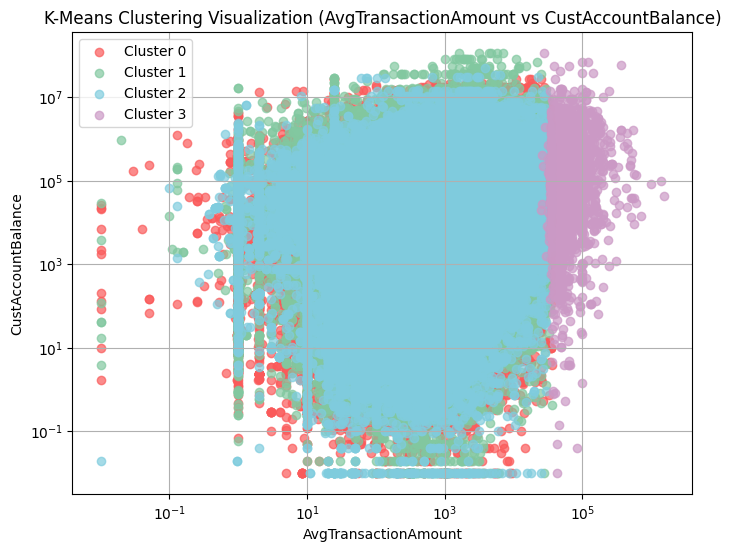

In [19]:
# Selecting two features for visualization
feature1 = 'AvgTransactionAmount'
feature2 = 'CustAccountBalance'

# Create a new DataFrame containing these two features and category labels
visualization_df = X[[feature1, feature2]].copy()
visualization_df['Labels'] = kmeans_labels

# Create a color dictionary for different categories
colors = {
    0: '#fa5a5a',
    1: '#82c8a0',
    2: '#7fccde',
    3: '#cb99c5'
}

# Plot scatterplot, color-coded by category
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    subset = visualization_df[visualization_df['Labels'] == label]
    plt.scatter(subset[feature1], subset[feature2], c=color, label=f'Cluster {label}', alpha=0.7)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'K-Means Clustering Visualization ({feature1} vs {feature2})')
plt.legend()
plt.grid(True)

# Set log scale
plt.xscale('log')
plt.yscale('log')

plt.show()

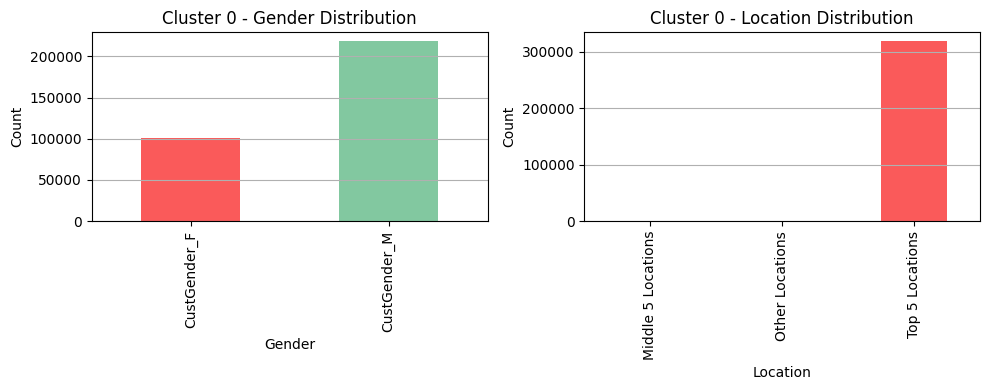

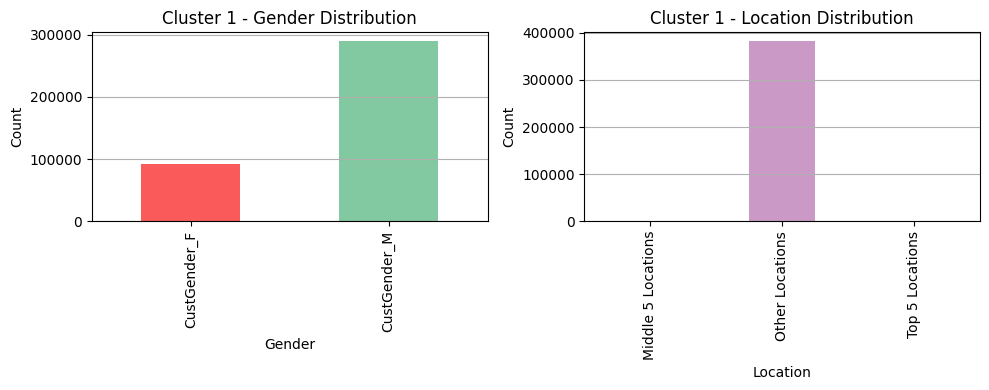

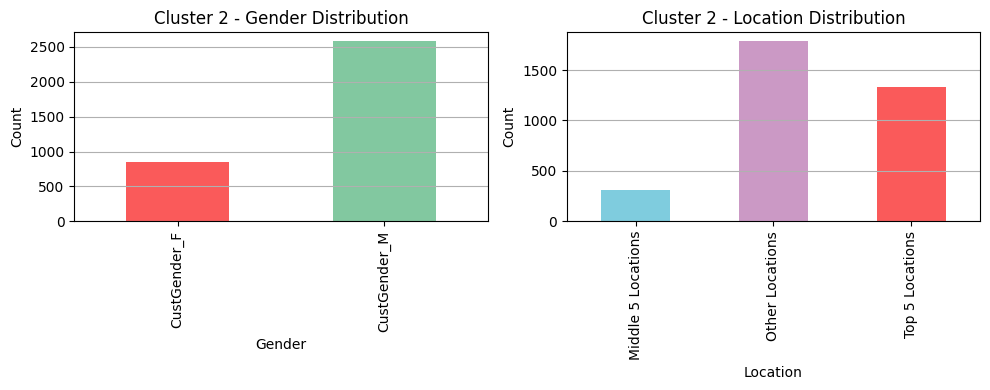

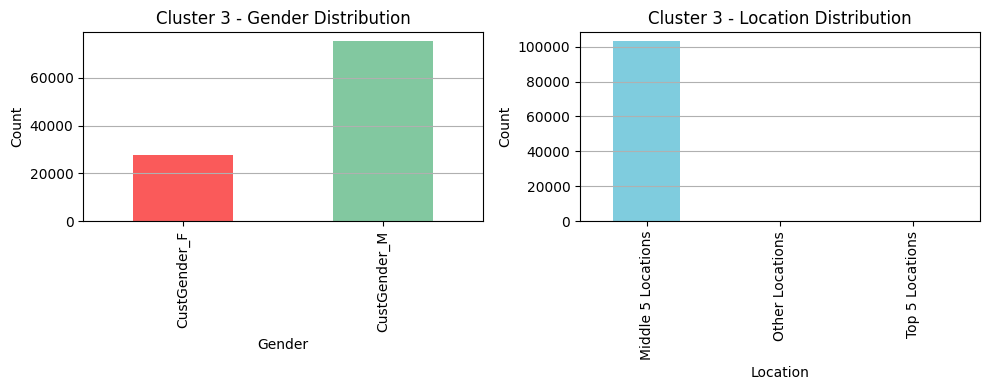

In [78]:
# Extract one-hot encoded feature columns
gender_columns = ['CustGender_F', 'CustGender_M']
location_columns = ['Middle 5 Locations', 'Other Locations', 'Top 5 Locations']

# Create a new DataFrame containing one-hot encoded features and category labels
comparison_df = X.copy()
comparison_df['Labels'] = kmeans_labels

# Calculate the distribution of one-hot encoded features in each clustering category
for label in range(4):
    label_df = comparison_df[comparison_df['Labels'] == label]
    gender_count = label_df[gender_columns].sum()
    location_count = label_df[location_columns].sum()

    # Plot the comparison of one-hot encoded feature distributions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    gender_count.plot(kind='bar', ax=axes[0], color=['#fa5a5a', '#82c8a0'])
    axes[0].set_title(f'Cluster {label} - Gender Distribution')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y')
    
    location_count.plot(kind='bar', ax=axes[1], color=['#7fccde', '#cb99c5', '#fa5a5a'])
    axes[1].set_title(f'Cluster {label} - Location Distribution')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Count')
    axes[1].grid(axis='y')

    plt.tight_layout()
    plt.show()


#### (2) Birch Clustering

In [57]:
# Selecting specific columns for the new feature vector
selected_columns = ['Middle 5 Locations', 'Other Locations', 'Top 5 Locations', 'CustAccountBalance']
X_second = X [selected_columns].copy()

In [58]:
X_second

,Middle 5 Locations,Other Locations,Top 5 Locations,CustAccountBalance
0,False,True,False,9283.45
1,False,True,False,152832.32
2,False,True,False,20205.36
3,False,True,False,3251.63
4,False,True,False,9.85
...,...,...,...,...
884260,True,False,False,20573.68
884261,True,False,False,1602907.04
884262,False,False,True,716332.75
884263,False,False,True,405469.42


In [59]:
scaler = StandardScaler()
X_second_scaled = scaler.fit_transform(X_second)

In [60]:
# Birch clustering
birch = Birch(n_clusters=4)
birch_labels = birch.fit_predict(X_second_scaled)

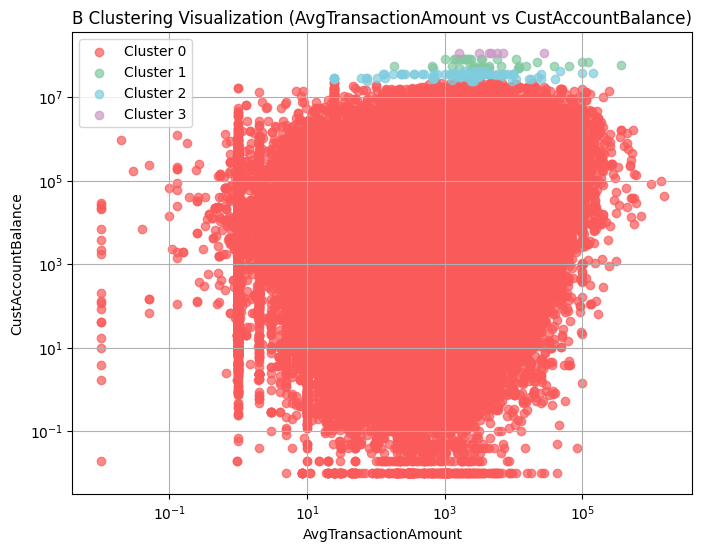

In [61]:
# Selecting two features for visualization
feature1 = 'AvgTransactionAmount'
feature2 = 'CustAccountBalance'

# Create a new DataFrame containing these two features and category labels
visualization_df = X[[feature1, feature2]].copy()
visualization_df['Labels'] = birch_labels

# Create a color dictionary for different categories
colors = {
    0: '#fa5a5a',
    1: '#82c8a0',
    2: '#7fccde',
    3: '#cb99c5'
}

# Plot scatterplot, color-coded by category
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    subset = visualization_df[visualization_df['Labels'] == label]
    plt.scatter(subset[feature1], subset[feature2], c=color, label=f'Cluster {label}', alpha=0.7)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'B Clustering Visualization ({feature1} vs {feature2})')
plt.legend()
plt.grid(True)

# Set log scale
plt.xscale('log')
plt.yscale('log')

plt.show()

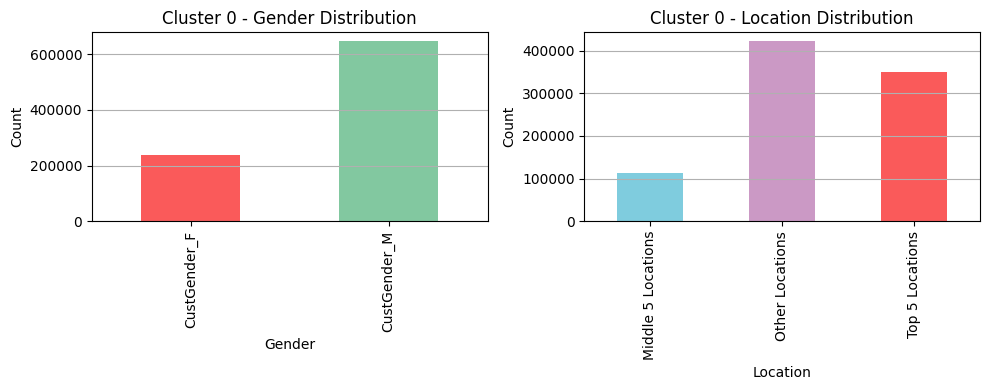

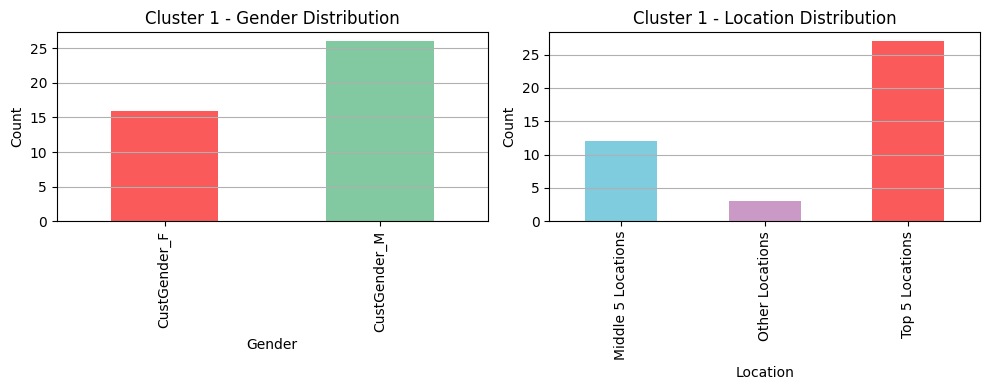

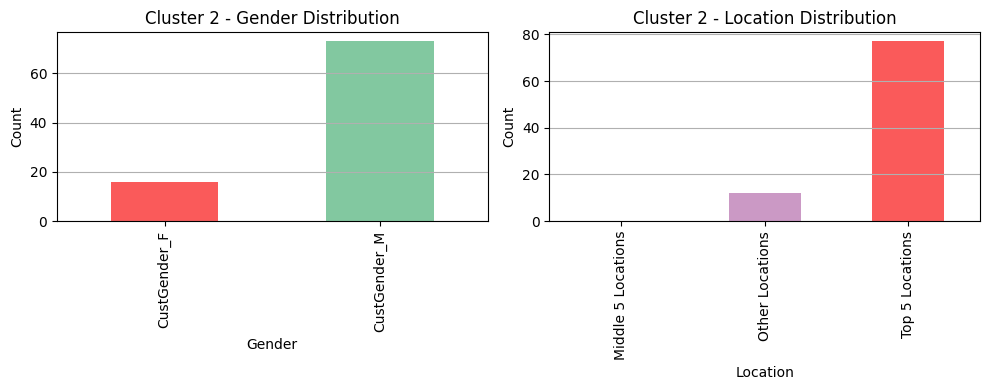

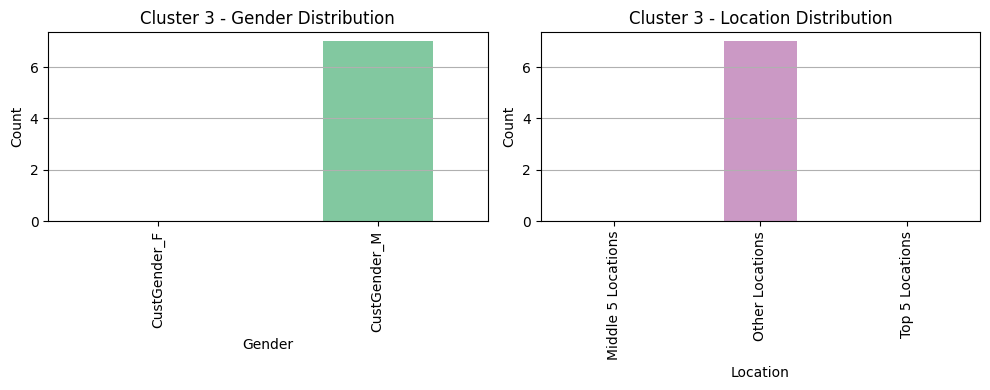

In [62]:
# Extract one-hot encoded feature columns
gender_columns = ['CustGender_F', 'CustGender_M']
location_columns = ['Middle 5 Locations', 'Other Locations', 'Top 5 Locations']

# Create a new DataFrame containing one-hot encoded features and category labels
comparison_df = X.copy()
comparison_df['Labels'] = birch_labels

# Calculate the distribution of one-hot encoded features in each clustering category
for label in range(4):
    label_df = comparison_df[comparison_df['Labels'] == label]
    gender_count = label_df[gender_columns].sum()
    location_count = label_df[location_columns].sum()

    # Plot the comparison of one-hot encoded feature distributions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    gender_count.plot(kind='bar', ax=axes[0], color=['#fa5a5a', '#82c8a0'])
    axes[0].set_title(f'Cluster {label} - Gender Distribution')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y')
    
    location_count.plot(kind='bar', ax=axes[1], color=['#7fccde', '#cb99c5', '#fa5a5a'])
    axes[1].set_title(f'Cluster {label} - Location Distribution')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Count')
    axes[1].grid(axis='y')

    plt.tight_layout()
    plt.show()


#### (3) MiniBatchKMeans 

In [17]:
# Selecting specific columns for the new feature vector
selected_columns = ['CustAccountBalance', 'AvgTransactionAmount']
X_third = X[selected_columns].copy()

In [18]:
X_third

,CustAccountBalance,AvgTransactionAmount
0,9283.45,475.756667
1,152832.32,1395.956667
2,20205.36,925.750000
3,3251.63,417.333333
4,9.85,6312.166667
...,...,...
884260,20573.68,460.000000
884261,1602907.04,4865.000000
884262,716332.75,649.000000
884263,405469.42,398.000000


In [19]:
scaler = StandardScaler()
X_third_scaled = scaler.fit_transform(X_third)

In [20]:
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=100, random_state=42)
mini_batch_kmeans_labels = mini_batch_kmeans.fit_predict(X)

D:\Anaconda\envs\python3.8_torch2.1\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
D:\Anaconda\envs\python3.8_torch2.1\lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


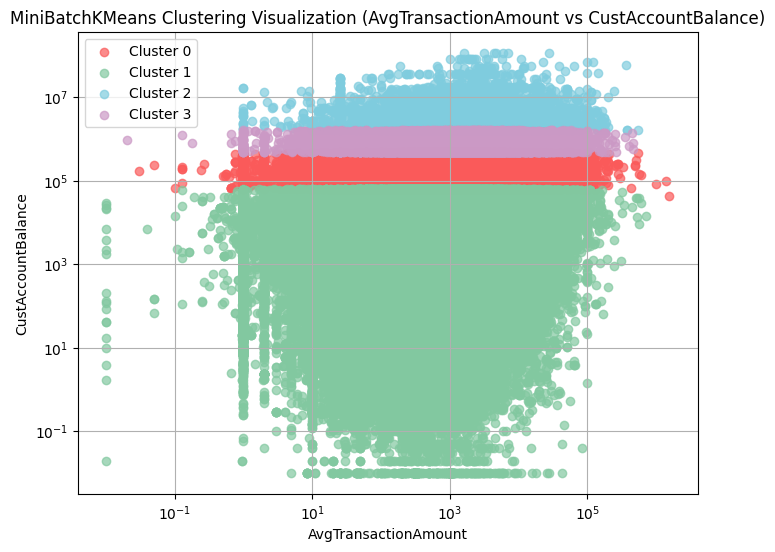

In [47]:
# Selecting two features for visualization
feature1 = 'AvgTransactionAmount'
feature2 = 'CustAccountBalance'

# Create a new DataFrame containing these two features and category labels
visualization_df = X[[feature1, feature2]].copy()
visualization_df['Labels'] = mini_batch_kmeans_labels

# Create a color dictionary for different categories
colors = {
    0: '#fa5a5a',
    1: '#82c8a0',
    2: '#7fccde',
    3: '#cb99c5'
}

# Plot scatterplot, color-coded by category
plt.figure(figsize=(8, 6))
for label, color in colors.items():
    subset = visualization_df[visualization_df['Labels'] == label]
    plt.scatter(subset[feature1], subset[feature2], c=color, label=f'Cluster {label}', alpha=0.7)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'MiniBatchKMeans Clustering Visualization ({feature1} vs {feature2})')
plt.legend()
plt.grid(True)

# Set log scale
plt.xscale('log')
plt.yscale('log')

plt.show()

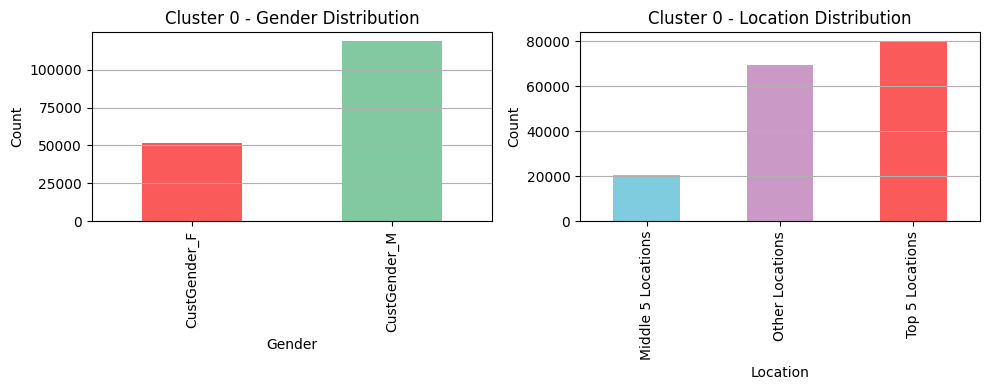

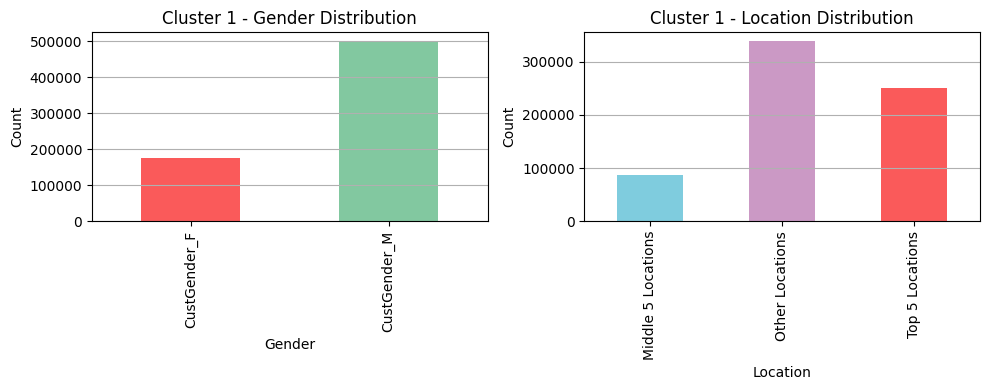

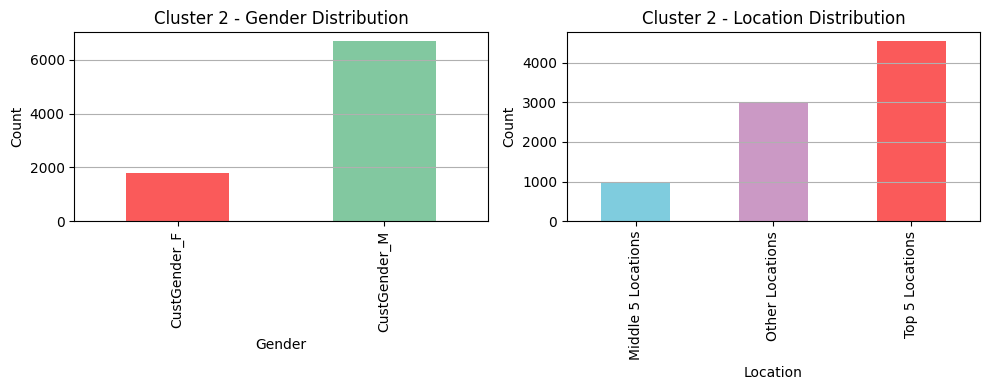

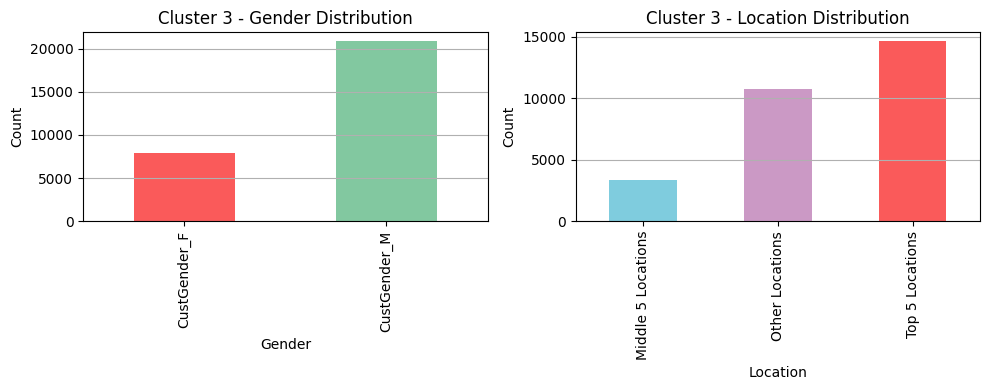

In [48]:
# Extract one-hot encoded feature columns
gender_columns = ['CustGender_F', 'CustGender_M']
location_columns = ['Middle 5 Locations', 'Other Locations', 'Top 5 Locations']

# Create a new DataFrame containing one-hot encoded features and category labels
comparison_df = X.copy()
comparison_df['Labels'] = mini_batch_kmeans_labels

# Calculate the distribution of one-hot encoded features in each clustering category
for label in range(4):
    label_df = comparison_df[comparison_df['Labels'] == label]
    gender_count = label_df[gender_columns].sum()
    location_count = label_df[location_columns].sum()

    # Plot the comparison of one-hot encoded feature distributions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    gender_count.plot(kind='bar', ax=axes[0], color=['#fa5a5a', '#82c8a0'])
    axes[0].set_title(f'Cluster {label} - Gender Distribution')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y')
    
    location_count.plot(kind='bar', ax=axes[1], color=['#7fccde', '#cb99c5', '#fa5a5a'])
    axes[1].set_title(f'Cluster {label} - Location Distribution')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Count')
    axes[1].grid(axis='y')

    plt.tight_layout()
    plt.show()
